# Several aggregations by category

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nasdaq = pd.read_excel('data/listings.xlsx', sheet_name='nasdaq', na_values=['n/a'])
nasdaq['market_cap_m'] = nasdaq['Market Capitalization'].div(1e6)

## Pandas `agg` methods allows us to pass a list of statistical metrics

In [3]:
by_sector = nasdaq.groupby('Sector')
by_sector.market_cap_m.agg(['size','mean']).sort_values('size')

,size,mean
Sector,,
Transportation,52,2869.660007
Energy,66,826.607608
Public Utilities,66,2357.865315
Basic Industries,78,724.899934
Consumer Durables,88,839.802607
Miscellaneous,89,3445.655935
Consumer Non-Durables,103,3104.051206
Capital Goods,172,1511.237373
Consumer Services,348,5582.344175


- Another option is to pass a dictionary to **`agg`** method. This allows us to assign labels to the statistics

In [4]:
by_sector.market_cap_m.agg({'#Obs':'size', 'Average':'mean'})

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,#Obs,Average
Sector,,
Basic Industries,78,724.899934
Capital Goods,172,1511.237373
Consumer Durables,88,839.802607
Consumer Non-Durables,103,3104.051206
Consumer Services,348,5582.344175
Energy,66,826.607608
Finance,627,1044.090205
Health Care,645,1758.709197
Miscellaneous,89,3445.655935


- If we apply **`agg method`** before selecting a column, then we can pass a dictionary to where we can pass the **`column name`** as key & the **`statistical operation to be performed`** as value

In [5]:
by_sector.agg({'market_cap_m':'size', 'IPO Year':'median'})

,market_cap_m,IPO Year
Sector,,
Basic Industries,78,1996.5
Capital Goods,172,2000.0
Consumer Durables,88,2002.5
Consumer Non-Durables,103,1998.0
Consumer Services,348,2005.0
Energy,66,2011.0
Finance,627,2014.0
Health Care,645,2014.0
Miscellaneous,89,2005.0


### Aggregate by two or more categories at the same time

In [6]:
by_sector_year = nasdaq.groupby(['Sector', 'IPO Year'])
by_sector_year.market_cap_m.mean()

Sector            IPO Year
Basic Industries  1972.0        877.240005
                  1973.0       1445.697371
                  1986.0       1396.817381
                  1988.0         24.847526
                  1990.0        434.808483
                  1991.0          9.338401
                  1992.0        160.416661
                  1993.0       1933.224036
                  1994.0        163.267514
                  1995.0        125.342784
                  1996.0       4087.508427
                  1997.0         20.754774
                  2008.0        331.370813
                  2010.0        120.296167
                  2011.0         35.498729
                  2012.0        381.796074
                  2013.0         22.661533
                  2015.0        260.075564
                  2016.0         81.288336
Capital Goods     1972.0        889.230257
                  1980.0      14941.006076
                  1981.0         38.632877
                  1983.0   

### Select from MultiIndex()
- Select values from the above multiindex dataframe 
- use **`.loc[col]`** : select multiple row labels from the first level
- If we select a single label from first index level using .loc, then pandas returns a series with single index that only contains values from the second level

In [8]:
mcap_sector_year = by_sector_year.market_cap_m.mean()
mcap_sector_year.loc['Basic Industries']

IPO Year
1972.0     877.240005
1973.0    1445.697371
1986.0    1396.817381
1988.0      24.847526
1990.0     434.808483
1991.0       9.338401
1992.0     160.416661
1993.0    1933.224036
1994.0     163.267514
1995.0     125.342784
1996.0    4087.508427
1997.0      20.754774
2008.0     331.370813
2010.0     120.296167
2011.0      35.498729
2012.0     381.796074
2013.0      22.661533
2015.0     260.075564
2016.0      81.288336
Name: market_cap_m, dtype: float64

- we can also select multiple categories from the first level of multiindex, pandas will return series only with the selected subset of categories

In [10]:
mcap_sector_year.loc[['Basic Industries', 'Transportation']]

Sector            IPO Year
Basic Industries  1972.0       877.240005
                  1973.0      1445.697371
                  1986.0      1396.817381
                  1988.0        24.847526
                  1990.0       434.808483
                  1991.0         9.338401
                  1992.0       160.416661
                  1993.0      1933.224036
                  1994.0       163.267514
                  1995.0       125.342784
                  1996.0      4087.508427
                  1997.0        20.754774
                  2008.0       331.370813
                  2010.0       120.296167
                  2011.0        35.498729
                  2012.0       381.796074
                  2013.0        22.661533
                  2015.0       260.075564
                  2016.0        81.288336
Transportation    1986.0      1176.179710
                  1991.0      6646.778622
                  1992.0        56.074572
                  1993.0      3474.796885
       

## Company value by exchange and sector
- calculate the median market capitalization for each sector, differentiated by the exchange that the companies are listed on. Use .unstack() to pivot the exchange labels from the rows into the columns. 

Sector            Exchange
Basic Industries  amex         148.564581
                  nasdaq       150.385214
                  nyse        2450.240499
Capital Goods     amex          49.596035
                  nasdaq       293.801019
Name: market_cap_m, dtype: float64


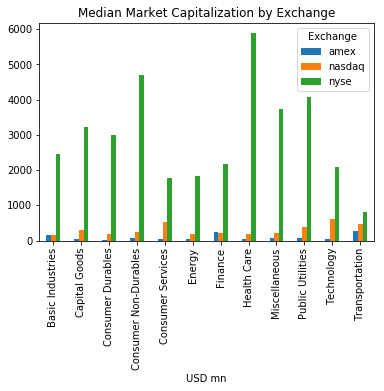

In [14]:
# Group listings by Sector and Exchange
amex = pd.read_excel('data/listings.xlsx', sheet_name='amex', na_values=['n/a'])
nyse = pd.read_excel('data/listings.xlsx', sheet_name='nyse', na_values=['n/a'])
nasdaq = pd.read_excel('data/listings.xlsx', sheet_name='nasdaq', na_values=['n/a'])
amex['Exchange'] = 'amex'
nyse['Exchange'] = 'nyse'
nasdaq['Exchange'] = 'nasdaq'
listings = pd.concat([amex, nyse, nasdaq])
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Calculate the median market cap
mcap_by_sector_exchange = by_sector_exchange.market_cap_m.median()

# Display the head of the result
print(mcap_by_sector_exchange.head())

# Unstack mcap_by_sector_exchange
mcap_unstacked = mcap_by_sector_exchange.unstack()

# Plot as a bar chart
mcap_unstacked.plot(kind='bar', title='Median Market Capitalization by Exchange')

# Set the x label
plt.xlabel('USD mn')

# Show the plot
plt.show()

- NYSE has the highest Median Market Capitalization for all sectors

### Calculate several metrics by sector and exchange
- The .agg() function allows you to aggregate your data in even more ways by accepting two kinds of arguments. Providing a list of names of statistical methods calculates more than one summary statistic at once, and providing a dictionary where keys are column names and values are statistical methods applies a particular summary statistic to a designated column.
- calculate the mean, median, and standard deviation of market capitalizations in millions of USD. 

In [15]:
# Create market_cap_m
listings['market_cap_m'] = listings['Market Capitalization'].div(1e6)

# Group listing by both Sector and Exchange
by_sector_exchange = listings.groupby(['Sector', 'Exchange'])

# Subset market_cap_m of by_sector_exchange
bse_mcm = by_sector_exchange['market_cap_m']

# Calculate mean, median, and std in summary
summary = bse_mcm.agg({'Average': 'mean', 'Median': 'median', 'Standard Deviation': 'std'})

# Print the summary
print(summary)

                                     Average       Median  Standard Deviation
Sector                Exchange                                               
Basic Industries      amex        391.646249   148.564581          605.307911
                      nasdaq      724.899934   150.385214         1445.544949
                      nyse       9590.514730  2450.240499        24845.469793
Capital Goods         amex        113.943659    49.596035          161.946636
                      nasdaq     1511.237373   293.801019         4829.846757
                      nyse      10166.901284  3215.112817        20254.615284
Consumer Durables     amex        234.445870    18.337396          441.813008
                      nasdaq      839.802607   177.593858         1907.604606
                      nyse       5854.121680  2982.585002         8996.673435
Consumer Non-Durables amex       8868.469007    60.087022        31715.734906
                      nasdaq     3104.051206   229.930660       

C:\Users\Shubham\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
